<div align='center'><h1 style='color:red'>Tuberculosis Prediction</h1>

<div class='alert alert-block alert-info' style="color:black">
<h3><b><i>
In this project, I developed a logistic regression model to predict tuberculosis (TB) based on patient features such as age, gender, and various symptoms and test results. The dataset was preprocessed by encoding categorical variables, and scaling features. After splitting the data into training and testing sets, we trained the logistic regression model and evaluated its performance using metrics like accuracy score and some visualization plots. The model demonstrated a good balance between sensitivity and specificity, with promising results for predicting TB diagnosis. Future steps include exploring additional features, comparing different models, and potentially gathering more data to enhance the model’s robustness and applicability in real-world scenarios.
</div>    

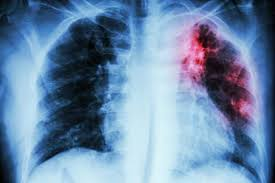

## For Kaggle Dataset : [Click here](https://www.kaggle.com/datasets/krishna1502/synthetic-data)

### Importing Libraries
We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("tuberculosis_classification_dataset.csv")

In [3]:
df.head()

,PatientID,Age,Gender,Cough,Fever,WeightLoss,NightSweats,ChestPain,Hemoptysis,Breathlessness,ContactHistory,TravelHistory,HIVStatus,PreviousTB,ChestXRay,SputumTest,Diagnosis
0,1,62,Female,6,Yes,14,No,No,Yes,Mild,No,Yes,Positive,No,Normal,Positive,Positive
1,2,65,Female,12,No,1,Yes,No,No,Mild,No,No,Negative,No,Abnormal,Positive,Positive
2,3,71,Other,12,No,8,No,No,Yes,Severe,Yes,Yes,Positive,No,Abnormal,Negative,Positive
3,4,18,Male,1,Yes,12,No,Yes,Yes,Mild,No,Yes,Negative,No,Abnormal,Positive,Positive
4,5,21,Female,8,No,8,Yes,No,No,Severe,No,No,Positive,Yes,Normal,Negative,Negative


In [4]:
df.shape

(10000, 17)

## Performing Exploratory Data Analysis

In [5]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Cough', 'Fever', 'WeightLoss',
       'NightSweats', 'ChestPain', 'Hemoptysis', 'Breathlessness',
       'ContactHistory', 'TravelHistory', 'HIVStatus', 'PreviousTB',
       'ChestXRay', 'SputumTest', 'Diagnosis'],
      dtype='object')

In [6]:
df.dtypes

PatientID          int64
Age                int64
Gender            object
Cough              int64
Fever             object
WeightLoss         int64
NightSweats       object
ChestPain         object
Hemoptysis        object
Breathlessness    object
ContactHistory    object
TravelHistory     object
HIVStatus         object
PreviousTB        object
ChestXRay         object
SputumTest        object
Diagnosis         object
dtype: object

In [7]:
df.describe()

,PatientID,Age,Cough,WeightLoss
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.474300,6.442600,6.983000
std,2886.89568,17.894948,3.453302,4.289003
min,1.00000,18.000000,1.000000,0.000000
25%,2500.75000,33.000000,3.000000,3.000000
50%,5000.50000,49.000000,6.000000,7.000000
75%,7500.25000,64.000000,9.000000,11.000000
max,10000.00000,79.000000,12.000000,14.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PatientID       10000 non-null  int64 
 1   Age             10000 non-null  int64 
 2   Gender          10000 non-null  object
 3   Cough           10000 non-null  int64 
 4   Fever           10000 non-null  object
 5   WeightLoss      10000 non-null  int64 
 6   NightSweats     10000 non-null  object
 7   ChestPain       10000 non-null  object
 8   Hemoptysis      10000 non-null  object
 9   Breathlessness  10000 non-null  object
 10  ContactHistory  10000 non-null  object
 11  TravelHistory   10000 non-null  object
 12  HIVStatus       10000 non-null  object
 13  PreviousTB      10000 non-null  object
 14  ChestXRay       10000 non-null  object
 15  SputumTest      10000 non-null  object
 16  Diagnosis       10000 non-null  object
dtypes: int64(4), object(13)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

PatientID         0
Age               0
Gender            0
Cough             0
Fever             0
WeightLoss        0
NightSweats       0
ChestPain         0
Hemoptysis        0
Breathlessness    0
ContactHistory    0
TravelHistory     0
HIVStatus         0
PreviousTB        0
ChestXRay         0
SputumTest        0
Diagnosis         0
dtype: int64

In [10]:
final_df = df.drop(df[['PatientID', 'Gender']],axis=1)
final_df.head()

,Age,Cough,Fever,WeightLoss,NightSweats,ChestPain,Hemoptysis,Breathlessness,ContactHistory,TravelHistory,HIVStatus,PreviousTB,ChestXRay,SputumTest,Diagnosis
0,62,6,Yes,14,No,No,Yes,Mild,No,Yes,Positive,No,Normal,Positive,Positive
1,65,12,No,1,Yes,No,No,Mild,No,No,Negative,No,Abnormal,Positive,Positive
2,71,12,No,8,No,No,Yes,Severe,Yes,Yes,Positive,No,Abnormal,Negative,Positive
3,18,1,Yes,12,No,Yes,Yes,Mild,No,Yes,Negative,No,Abnormal,Positive,Positive
4,21,8,No,8,Yes,No,No,Severe,No,No,Positive,Yes,Normal,Negative,Negative


In [11]:
final_df.shape

(10000, 15)

In [12]:
print(final_df["Breathlessness"].unique(),"\n")
print(final_df["HIVStatus"].unique(),"\n")
print(final_df["ChestXRay"].unique(),"\n")
print(final_df["SputumTest"].unique(),"\n")
print(final_df["Diagnosis"].unique(),"\n")

['Mild' 'Severe' 'Moderate'] 

['Positive' 'Negative'] 

['Normal' 'Abnormal'] 

['Positive' 'Negative'] 

['Positive' 'Negative'] 



In [13]:
final_df.replace({'Yes':1,'No':0,'Mild':1,'Moderate':2,'Severe':3,'Positive':1,'Negative':0,'Normal':1,'Abnormal':0},inplace=True)
final_df.head()

,Age,Cough,Fever,WeightLoss,NightSweats,ChestPain,Hemoptysis,Breathlessness,ContactHistory,TravelHistory,HIVStatus,PreviousTB,ChestXRay,SputumTest,Diagnosis
0,62,6,1,14,0,0,1,1,0,1,1,0,1,1,1
1,65,12,0,1,1,0,0,1,0,0,0,0,0,1,1
2,71,12,0,8,0,0,1,3,1,1,1,0,0,0,1
3,18,1,1,12,0,1,1,1,0,1,0,0,0,1,1
4,21,8,0,8,1,0,0,3,0,0,1,1,1,0,0


In [14]:
df.head()

,PatientID,Age,Gender,Cough,Fever,WeightLoss,NightSweats,ChestPain,Hemoptysis,Breathlessness,ContactHistory,TravelHistory,HIVStatus,PreviousTB,ChestXRay,SputumTest,Diagnosis
0,1,62,Female,6,Yes,14,No,No,Yes,Mild,No,Yes,Positive,No,Normal,Positive,Positive
1,2,65,Female,12,No,1,Yes,No,No,Mild,No,No,Negative,No,Abnormal,Positive,Positive
2,3,71,Other,12,No,8,No,No,Yes,Severe,Yes,Yes,Positive,No,Abnormal,Negative,Positive
3,4,18,Male,1,Yes,12,No,Yes,Yes,Mild,No,Yes,Negative,No,Abnormal,Positive,Positive
4,5,21,Female,8,No,8,Yes,No,No,Severe,No,No,Positive,Yes,Normal,Negative,Negative


### Performing Data Visualization

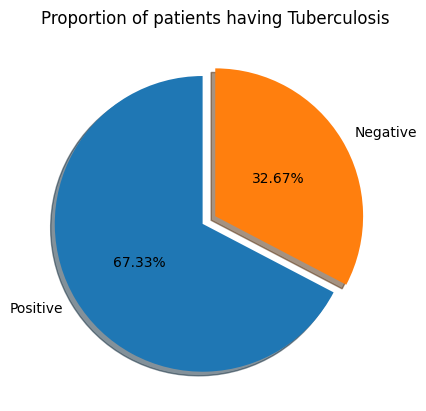

In [15]:
df['Diagnosis'].value_counts().plot(kind='pie',autopct='%1.2f%%',pctdistance=0.5,startangle=90,explode=[0.1,0],shadow=True)
plt.ylabel('')
plt.title("Proportion of patients having Tuberculosis")
plt.show()

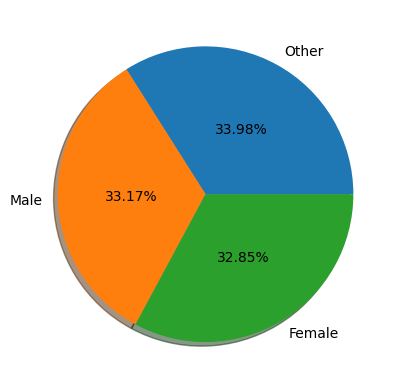

In [16]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',shadow=True,pctdistance=0.50)
plt.ylabel('')
plt.show()

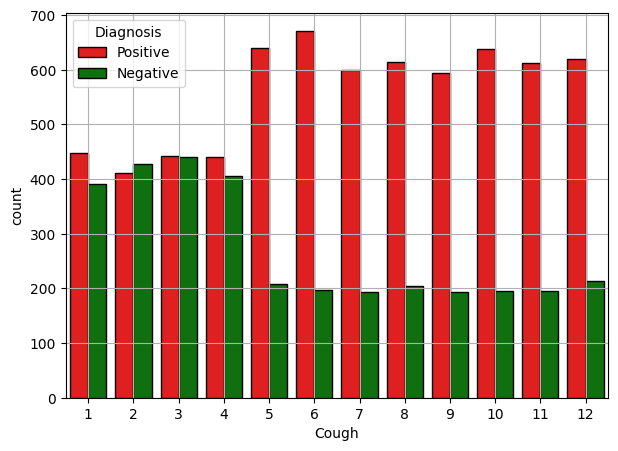

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['Cough'],hue=df['Diagnosis'],edgecolor='Black',palette=['red','green'])
plt.grid(True)
plt.show()

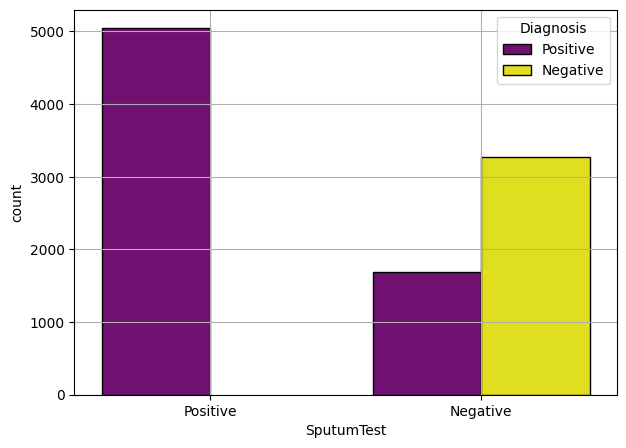

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['SputumTest'],hue=df['Diagnosis'],edgecolor='Black',palette=['purple','yellow'])
plt.grid(True)
plt.show()

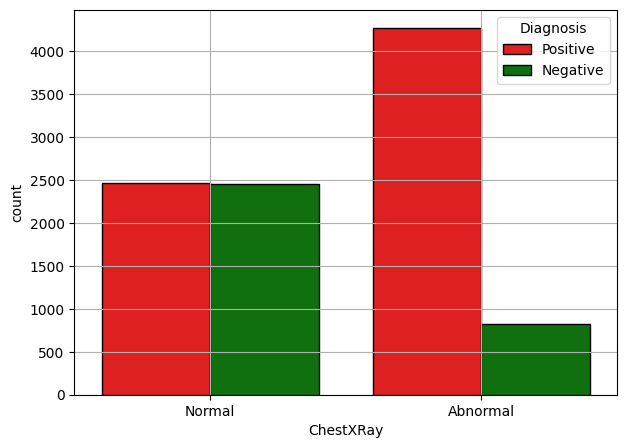

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['ChestXRay'],hue=df['Diagnosis'],edgecolor='Black',palette=['red','green'])
plt.grid(True)
plt.show()

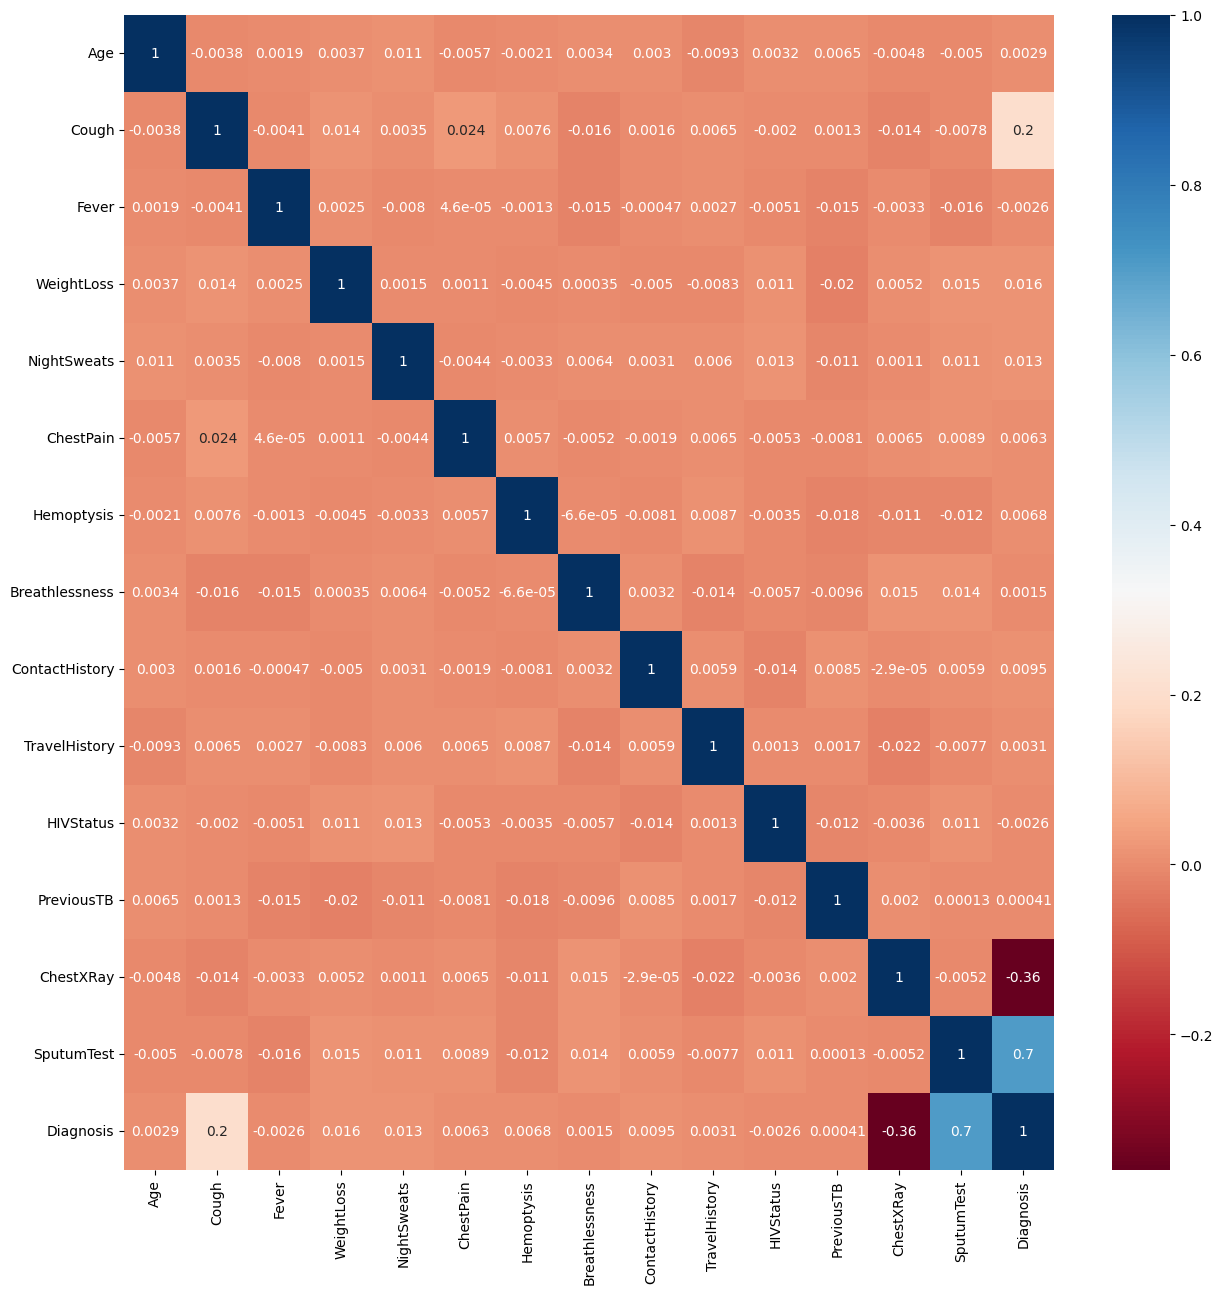

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),annot=True,cmap='RdBu')
plt.figure("Heatmap showing correlation between different variables")
plt.show()

> #### The Correlation heatmap shows that Cough and SputumTest variables have positive correlation with Diagnosis Target Variable.

> #### The ChextXRay variable have negative correlation with Diagnosis Target Variable.

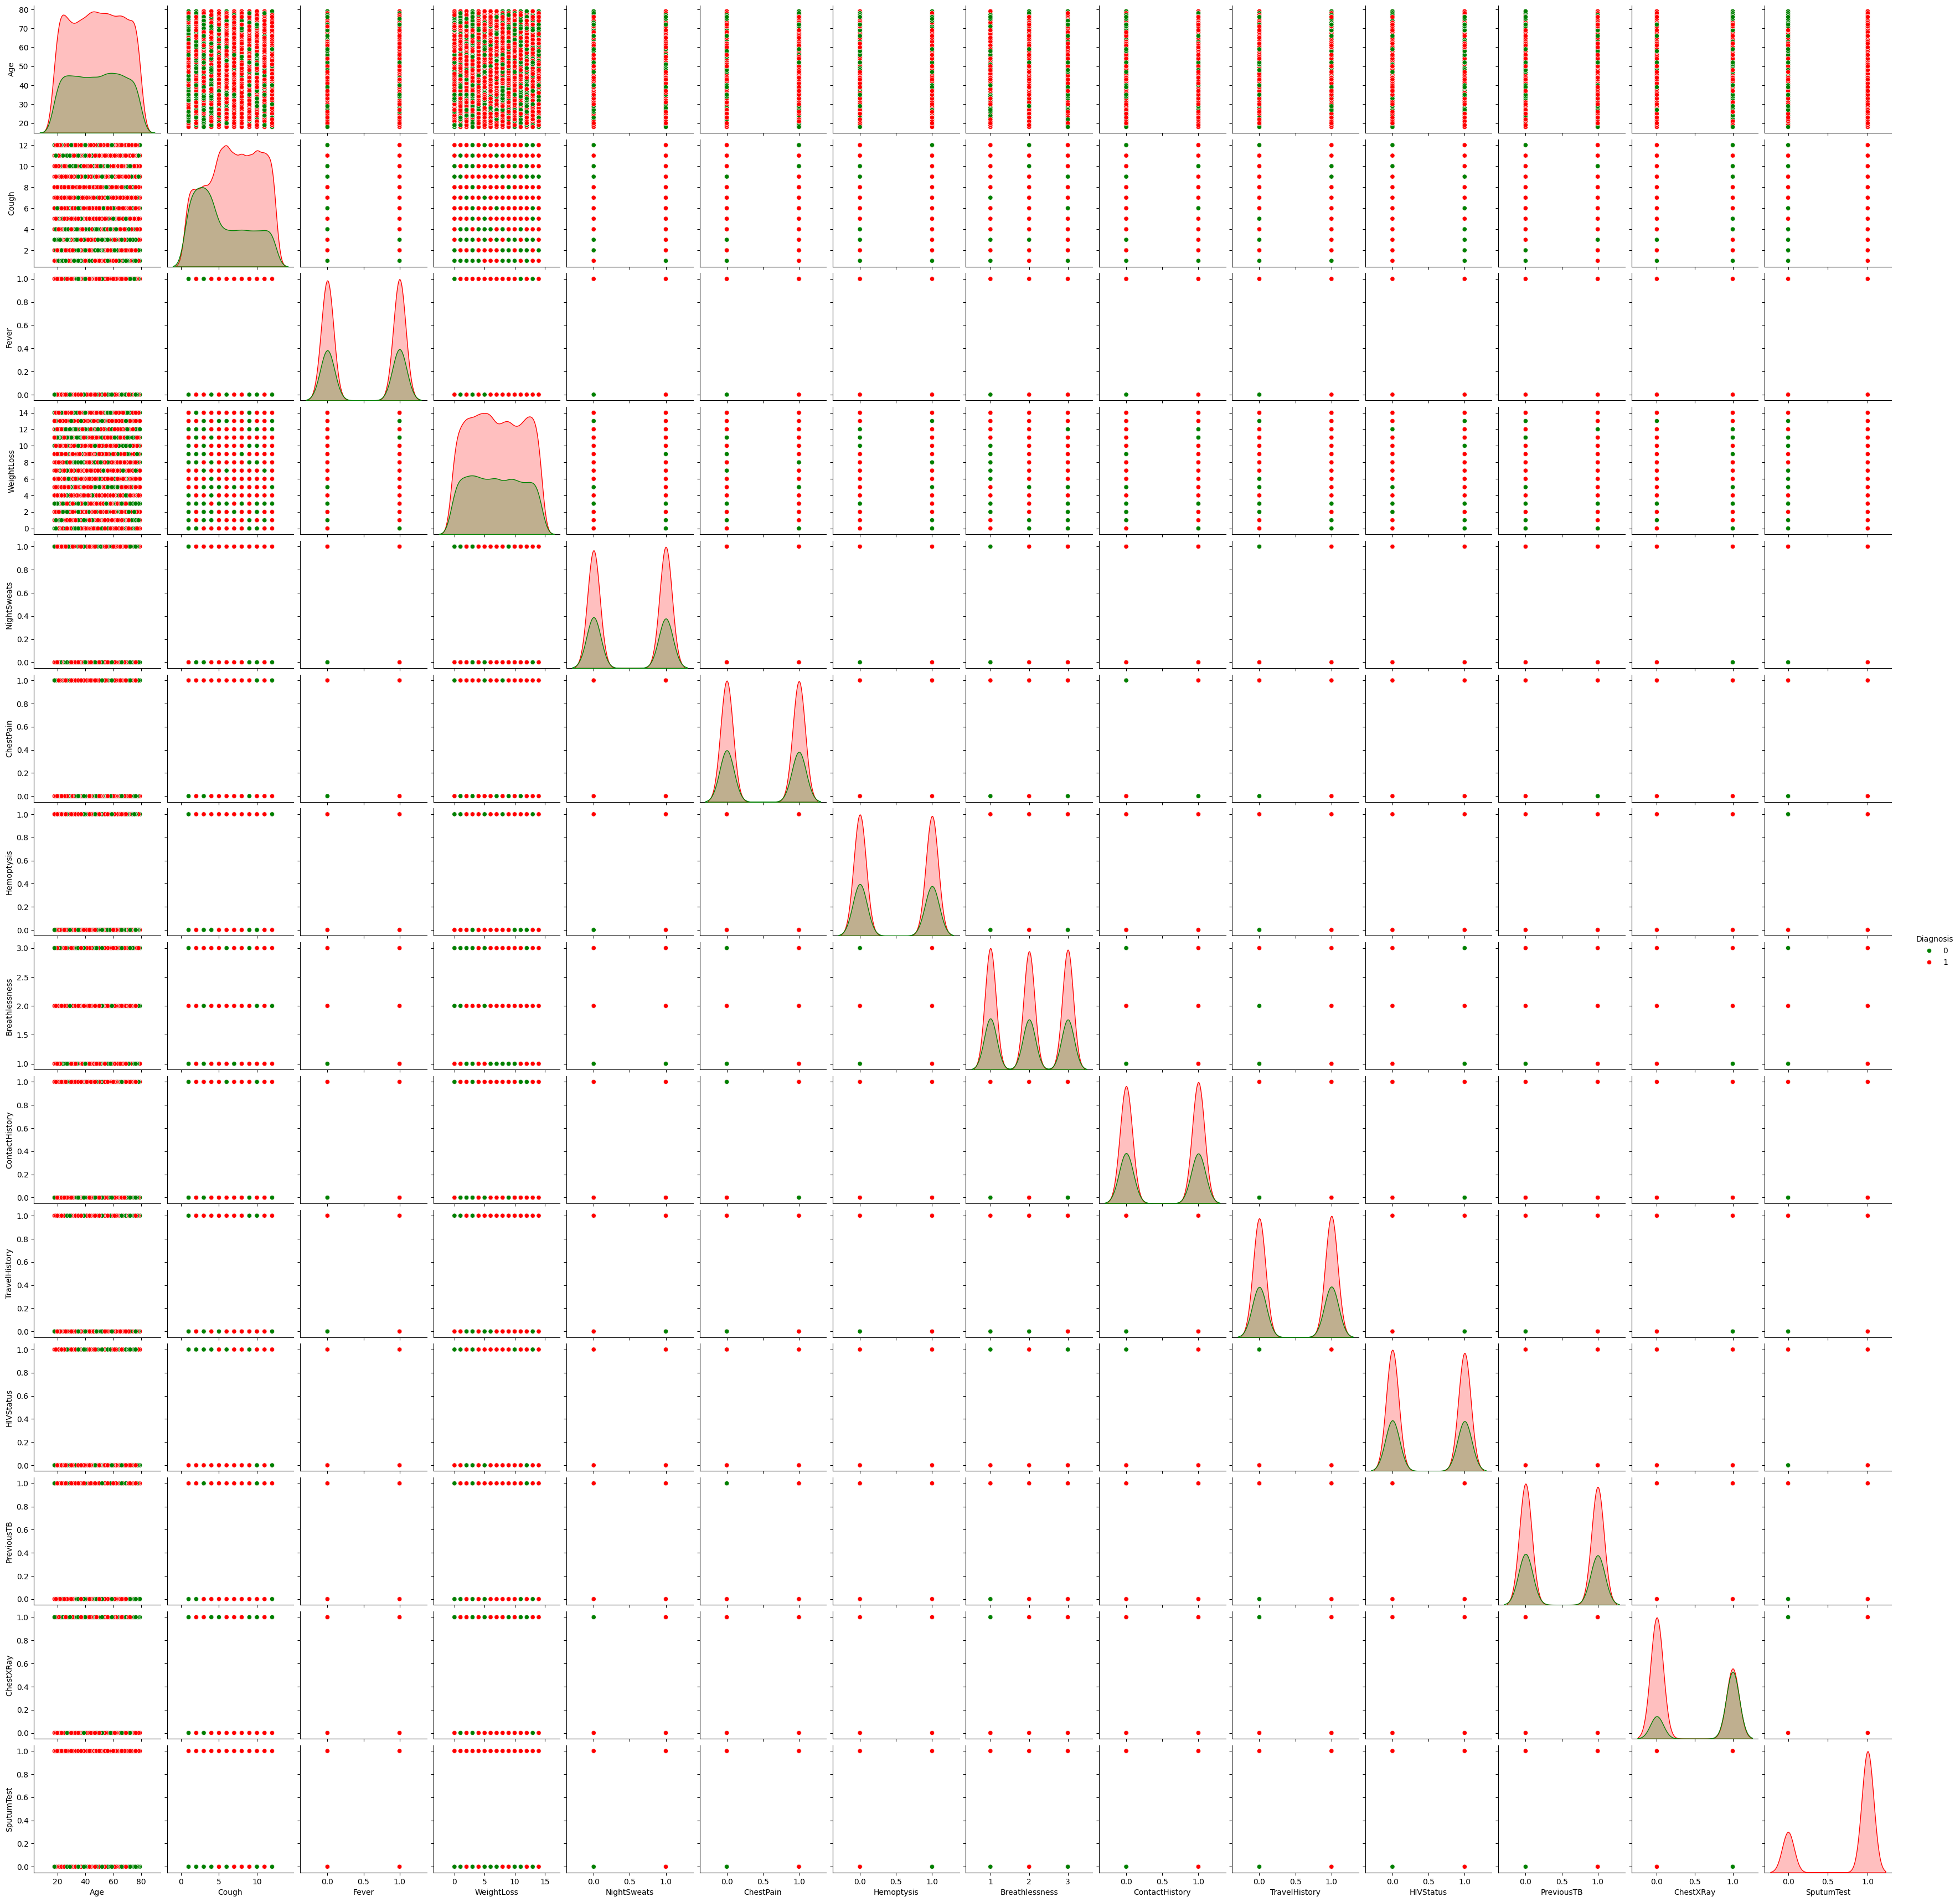

In [21]:
sns.pairplot(final_df,hue='Diagnosis',palette=['Green','Red'])
plt.show()

### Predictive Modelling

In [22]:
X=final_df[['Cough','ChestXRay','SputumTest']]
Y=final_df['Diagnosis']

#### Splitting the dataset into training and testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 3)
(8000,)
(2000, 3)
(2000,)


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
Scaler=StandardScaler()
Scaler.fit(X_train,Y_train)
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

### Using Logistic Regression for Classification

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [29]:
LR=LogisticRegression()
LR

LogisticRegression()

###### Hyperparameter Tuning

In [30]:
param_grid2={'C':[0.01,0.1,1,10],'solver':['lbfgs','saga','newton-cg', 'sag']}
Grid=GridSearchCV(LR,param_grid=param_grid2,cv=10)
Grid.fit(X_train,Y_train)
print("The best hyperparameters are : ",Grid.best_params_ ,"\n")
print("The best cross validation score is : ",Grid.best_score_ ,"\n")

The best hyperparameters are :  {'C': 0.01, 'solver': 'lbfgs'} 

The best cross validation score is :  1.0 



In [31]:
best_LR_model=Grid.best_estimator_

In [32]:
yhat=best_LR_model.predict(X_test)

#### Logistic Regression Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print("The accuracy for the Logistic regression is -> ",accuracy_score(Y_test,yhat),' or ',accuracy_score(Y_test,yhat)*100,'%')

The accuracy for the Logistic regression is ->  0.98  or  98.0 %


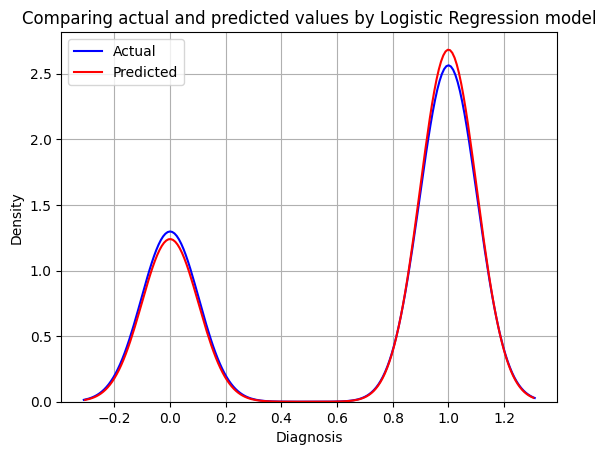

In [35]:
ax=sns.kdeplot(Y_test,color='blue')
sns.kdeplot(yhat,color='red',ax=ax)
plt.legend(['Actual','Predicted'],loc='upper left')
plt.title('Comparing actual and predicted values by Logistic Regression model')
plt.grid(True)
plt.show()

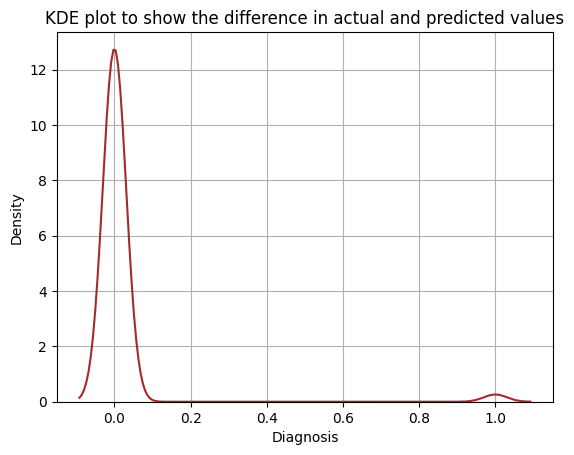

In [36]:
sns.kdeplot(yhat-Y_test,color='brown')
plt.title('KDE plot to show the difference in actual and predicted values')
plt.grid(True)
plt.show()

###### Creating a Data Frame for actual values and predicted values by all the three models.

In [37]:
df

,PatientID,Age,Gender,Cough,Fever,WeightLoss,NightSweats,ChestPain,Hemoptysis,Breathlessness,ContactHistory,TravelHistory,HIVStatus,PreviousTB,ChestXRay,SputumTest,Diagnosis
0,1,62,Female,6,Yes,14,No,No,Yes,Mild,No,Yes,Positive,No,Normal,Positive,Positive
1,2,65,Female,12,No,1,Yes,No,No,Mild,No,No,Negative,No,Abnormal,Positive,Positive
2,3,71,Other,12,No,8,No,No,Yes,Severe,Yes,Yes,Positive,No,Abnormal,Negative,Positive
3,4,18,Male,1,Yes,12,No,Yes,Yes,Mild,No,Yes,Negative,No,Abnormal,Positive,Positive
4,5,21,Female,8,No,8,Yes,No,No,Severe,No,No,Positive,Yes,Normal,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,47,Other,11,No,2,Yes,Yes,No,Moderate,Yes,Yes,Positive,Yes,Abnormal,Negative,Positive
9996,9997,43,Other,6,Yes,8,Yes,No,No,Moderate,No,Yes,Negative,No,Normal,Positive,Positive
9997,9998,37,Other,3,No,6,Yes,Yes,Yes,Severe,Yes,Yes,Negative,No,Normal,Positive,Positive
9998,9999,50,Other,6,Yes,10,No,No,Yes,Moderate,No,Yes,Negative,No,Abnormal,Positive,Positive


In [39]:
pred_df=pd.DataFrame({'Actual Diagnosis':Y_test,'Predicted':yhat})

In [40]:
pred_df.rename({1:'Positive',0:'Negative'})

,Actual Diagnosis,Predicted
1603,0,0
8713,1,1
4561,1,1
6600,1,1
2558,1,1
...,...,...
1944,0,0
5978,0,1
9809,1,1
4014,1,1


In [41]:
pred_df.head(60)

,Actual Diagnosis,Predicted
1603,0,0
8713,1,1
4561,1,1
6600,1,1
2558,1,1
7642,0,0
8912,0,0
3319,1,1
6852,1,1
1366,1,1


# Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)